In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Implementação

## 1. Implemente os seguintes métodos:

### a. Regressão Logística - Gradiente Descendente

In [2]:
from logistic_regression import SingleLabelLogisticRegression

### b. Naive Bayes Gaussiano

In [3]:
from gaussian_naive_bayes import GaussianNaiveBayes

### c. Discriminante Quadrático Gaussiano

In [4]:
from gaussian_quadratic_discriminant import GaussianQuadraticDiscriminant

## 2. Implemente a função acurácia(y_true, y_pred) que retorna a porcentagem de acerto de y_true.

In [5]:
def accuracy(y_true, y_pred):
    return (len(y_true) - np.count_nonzero(y_true - y_pred)) / len(y_true)

## 3. Implemente uma função que receba um classificador e o conjunto de testes e exiba uma matriz de confusão:

**Assinatura: plot_confusion_matrix(X, y, clf)**

**Código de exemplo: <https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html>**

In [6]:
# source: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

from utils import confusion_matrix


def plot_confusion_matrix(X, y, clf):
    labels = np.unique(y)

    y_true = y
    y_pred = clf.predict(X)

    cm = confusion_matrix(y, y_pred, labels)
    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)

    thresh = cm.max() / 2

    for (i, j) in itertools.product(range(cm.shape[0]),
                                    range(cm.shape[1])):
        plt.text(j, i, '{:,}'.format(cm[i, j]),
                 horizontalalignment='center', color=('white' if cm[i,
                 j] > thresh else 'black'))

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 4. Implemente uma função que receba o classificador e o conjunto de teste e exiba o conjunto de testes em um gráfico de dispersão juntamente com as fronteiras de separação do classificador.

**Assinatura: plot_boundaries(X, y, clf)**

**Código de exemplo: <https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html>**

In [7]:
# source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

def plot_boundaries(X, y, clf):
    (x_min, x_max) = (X[:, 0].min() - .5, X[:, 0].max() + .5)
    (y_min, y_max) = (X[:, 1].min() - .5, X[:, 1].max() + .5)

    h = .02

    (xx, yy) = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,
                           y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k',
                cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

# Conjunto de dados

## 1. Carregar trab2.data

In [8]:
from utils import MinMaxScaler

dataset = np.genfromtxt("./data/ex2data1.txt", delimiter=",")

mms = MinMaxScaler()

mms.fit(dataset)

normalized_dataset = mms.transform(dataset)

## 2. A duas primeiras colunas são as características e a última coluna é a variável alvo

In [9]:
X, y = normalized_dataset[:, :-1], normalized_dataset[:, -1]

## 3. Usar 70% do conjunto para treino e 30% para teste

In [10]:
from utils import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3)

# Relatório

In [11]:
sllr = SingleLabelLogisticRegression(learning_rate=0.001, ages=10000, threshold=0.54)
sllr.fit(X_train, y_train)

gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

gqd = GaussianQuadraticDiscriminant()
gqd.fit(X_train, y_train)

## 1. Para cada uma das técnicas de classificação apresente:

### a. A porcentagem de predições corretas para o conjunto de teste usando a função acurácia.

**Regressão Logística – Gradiente Descendente**

In [12]:
y_pred = sllr.predict(X_test)

print('accuracy:', accuracy(y_test, y_pred))

accuracy: 0.9333333333333333


**Naive Bayes Gaussiano**

In [13]:
y_pred = gnb.predict(X_test)

print('accuracy:', accuracy(y_test, y_pred))

accuracy: 0.8


**Discriminante Quadrático Gaussiano**

In [14]:
y_pred = gqd.predict(X_test)

print('accuracy:', accuracy(y_test, y_pred))

accuracy: 0.8333333333333334


### b. A matriz de confusão.

**Regressão Logística – Gradiente Descendente**

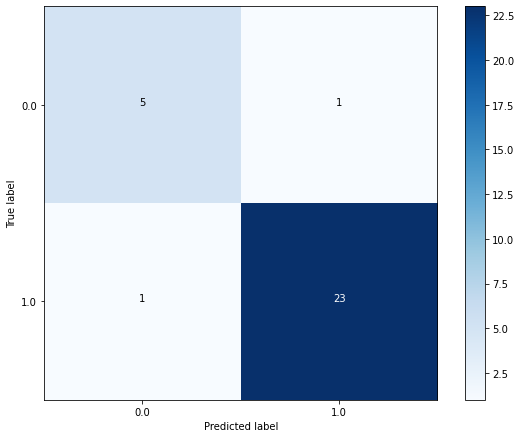

In [15]:
plot_confusion_matrix(X_test, y_test, sllr)

**Naive Bayes Gaussiano**

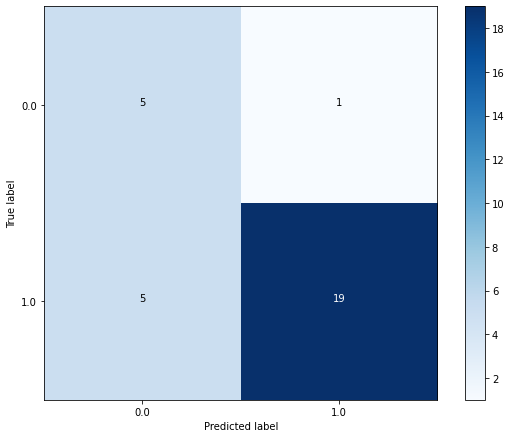

In [16]:
plot_confusion_matrix(X_test, y_test, gnb)

**Discriminante Quadrático Gaussiano**

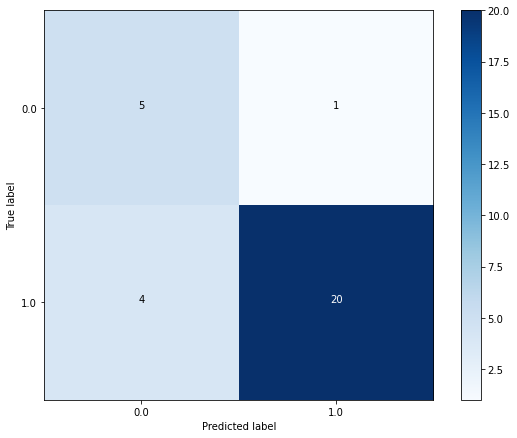

In [17]:
plot_confusion_matrix(X_test, y_test, gqd)

### c. O dado em um gráfico de dispersão com as fronteiras de separação.

**Regressão Logística – Gradiente Descendente**

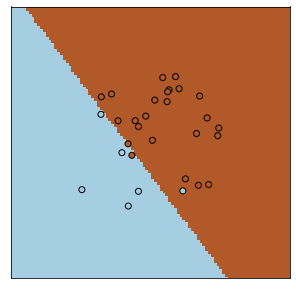

In [18]:
plot_boundaries(X_test, y_test, sllr)

**Naive Bayes Gaussiano**

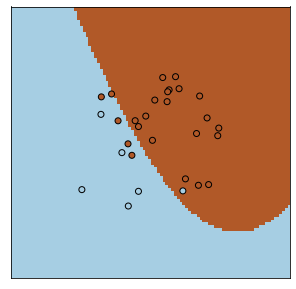

In [19]:
plot_boundaries(X_test, y_test, gnb)

**Discriminante Quadrático Gaussiano**

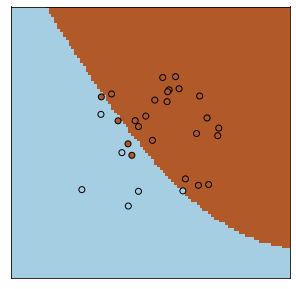

In [20]:
plot_boundaries(X_test, y_test, gqd)

## 2. O dado parece se linearmente separável ou não?

Sim, parece ser possível traçar uma linha reta que separa bem os dois tipos de dados (com exceção de algumas amostras que parecem ser outliers)

## 3. Quais dos métodos produziu fronteiras lineares?

Apenas o método utilizando regressão logística com gradiente descendente produziu fronteiras lineares. Os outros métodos produziram fronteiras aparentemente quadráticas.

## 4. Qual teve melhor acurácia?

O método da regressão logística com gradiente descendente teve melhor acurácia (0.93) que os métodos Naive Bayes Gaussiano (0.8) e Discriminante Quadrático Gaussiano (0.83) o que apoia a suposição de que os dados são linearmente separáveis (questão 2 do relatório).